In [1]:
%matplotlib inline
import sklearn
import keras
import matplotlib.pylab as plt
import matplotlib as mp
import numpy as np
import scipy as sp

Using Theano backend.


In [2]:
#mp.style.use('seaborn-pastel')

In [3]:
datamatrix = sp.random.rand(10,100)<0.1

In [4]:
import scipy.io as sio
ft=sio.loadmat("firingTimes.mat")

In [5]:
ft.keys()

['totalTime',
 'spikes',
 'all_v_mat',
 'allSpikes',
 'firings2',
 '__header__',
 '__globals__',
 'allFirings',
 'firings',
 'neuronsWithInput',
 'spikes2',
 '__version__',
 'v_mat',
 'v_mat2']

/home/pritish/installations/python-venvs/moose/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


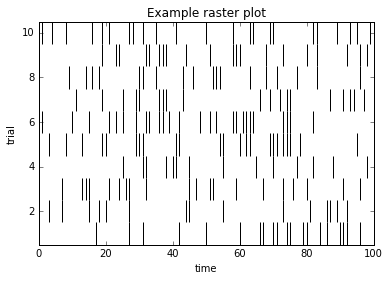

In [6]:

def raster(event_times_list, color='k'):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, color=color)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

nbins = 100
ntrials = 10
spikes = []
for i in range(ntrials):
    spikes.append(np.arange(nbins)[np.random.rand(nbins) < .2])

fig = plt.figure()
ax = raster(spikes)
plt.title('Example raster plot')
plt.xlabel('time')
plt.ylabel('trial')
fig.show()

# Figure 1 :

In [7]:
print ft.keys()
allSpikes=ft['allSpikes']
totalTime=ft['totalTime']*1.0


['totalTime', 'spikes', 'all_v_mat', 'allSpikes', 'firings2', '__header__', '__globals__', 'allFirings', 'firings', 'neuronsWithInput', 'spikes2', '__version__', 'v_mat', 'v_mat2']


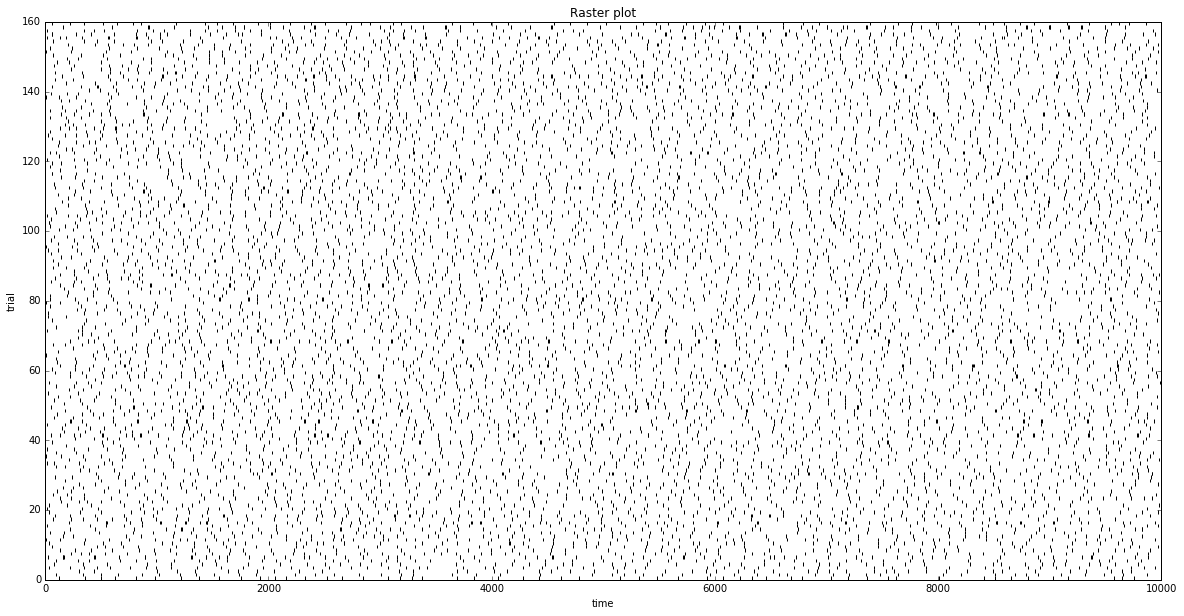

In [8]:
neurons,time=np.where(allSpikes==1)
# plt.figure(figsize=(10, 10))
# plt.scatter(time,neurons,color="k",marker='|')
# plt.show()

plt.figure(figsize=(20, 10))
plt.vlines(time,neurons,neurons+1)
plt.title('Raster plot')
plt.xlabel('time')
plt.ylabel('trial')
plt.show()

# Figure 2

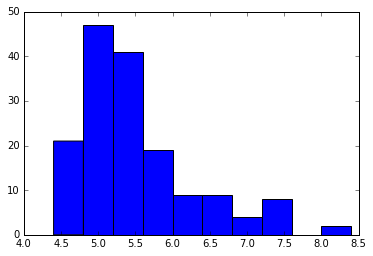

In [19]:
sp_per_sec = np.array(sum(allSpikes.T,1)/totalTime*1000)[0] #; % spikes per sec
# print sp_per_sec
plt.figure()
plt.hist(sp_per_sec,bins=10)
plt.show()

# Figure 3 

<function matplotlib.pyplot.colorbar>

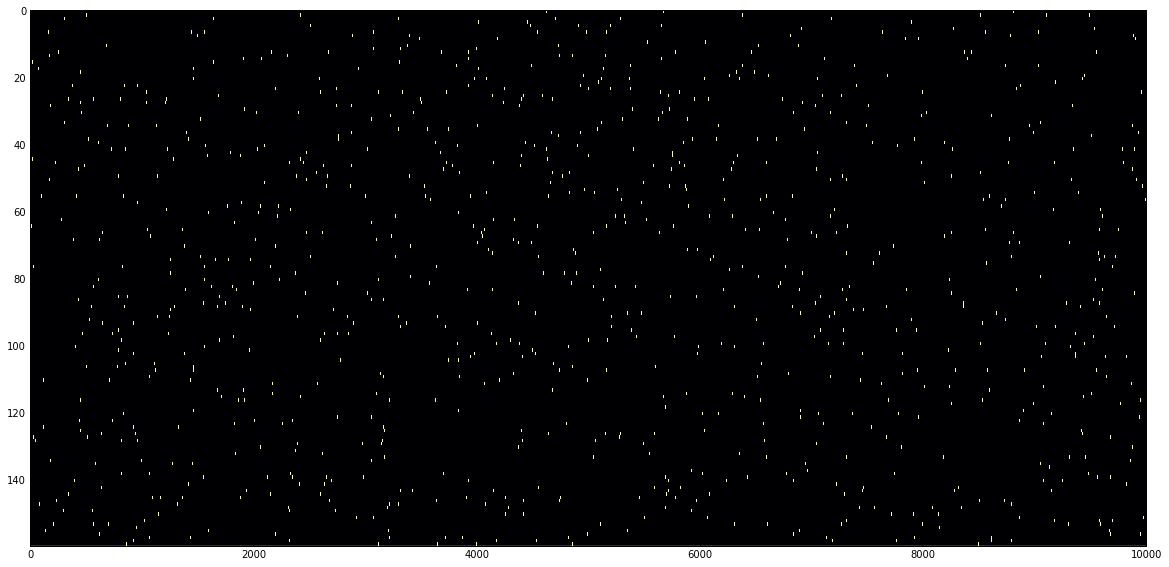

In [115]:
#print allSpikes[0,:]
plt.figure(figsize=(20, 10))
plt.imshow(allSpikes,aspect=30,cmap='magma',interpolation="None")
plt.colorbar

In [112]:
integrationWindow = 200#; %ms

#arr=sp.ndimage.filters.gaussian_filter1d(allSpikes[1:3,:],10,mode='constant')
unif_filter=np.zeros(allSpikes.shape)
gaus_filter=np.zeros(allSpikes.shape)
#plt.imshow(allSpikes*1000,aspect=40)
for i in range(allSpikes.shape[0]):
    unif_filter[i,:]=sp.ndimage.filters.uniform_filter1d(allSpikes[i,:]*1000,200,mode='constant')
    gaus_filter[i,:]=sp.ndimage.filters.gaussian_filter1d(allSpikes[i,:]*1000,50,mode='constant')
    

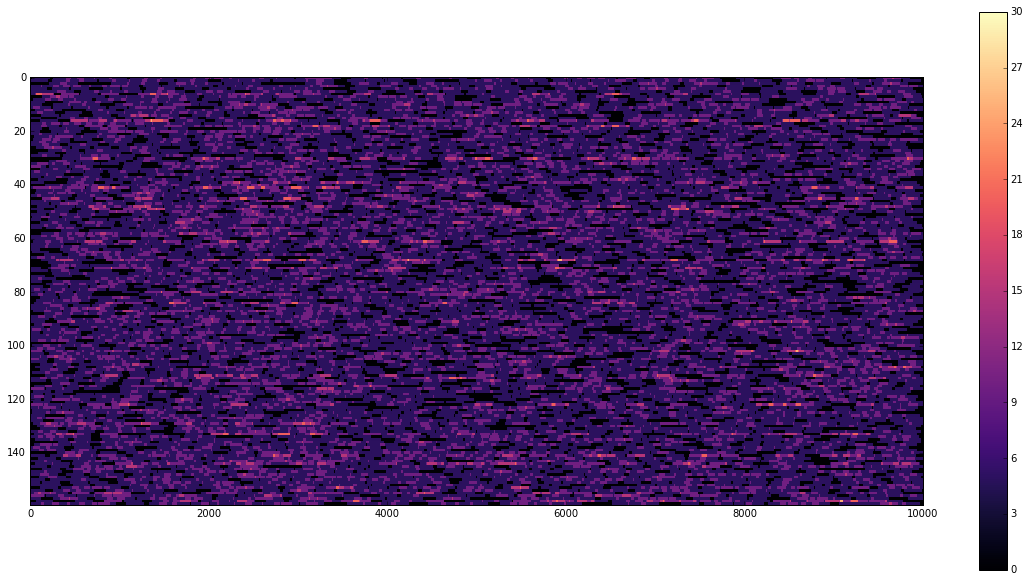

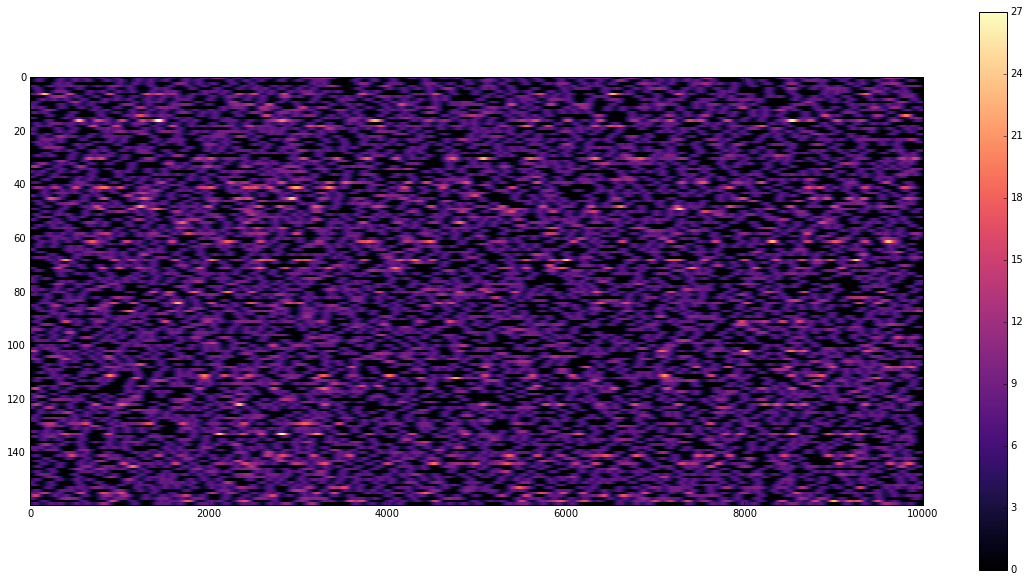

In [113]:
plt.figure(figsize=(20, 10))
plt.imshow(unif_filter,aspect=30,cmap='magma',interpolation="None")
plt.colorbar()

plt.figure(figsize=(20, 10))
plt.imshow(gaus_filter,aspect=30,cmap='magma',interpolation="None")
plt.colorbar()